# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [213]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_results_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [214]:
# Checking the number of mice.
number_of_mice = combined_results_df['Mouse ID'].nunique()
number_of_mice



249

In [215]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_results_df.loc[combined_results_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
duplicate

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [216]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_results_df[combined_results_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [217]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#combined_results_reduced = combined_results_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
#combined_results_reduced.head()

combine_results_reduced = combined_results_df.loc[combined_results_df['Mouse ID'] != 'g989',]
combine_results_reduced

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [218]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = combine_results_reduced['Mouse ID'].nunique()
number_of_mice

248

## Summary Statistics

In [219]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume= combine_results_reduced.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median__tumor_volume = combine_results_reduced.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = combine_results_reduced.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev_tumor_volume =  combine_results_reduced.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = combine_results_reduced.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
summary_stats_by_regimen = pd.DataFrame({
                    "Mean Tumor Volume": mean_tumor_volume,
                    "Median Tumor Volume": median__tumor_volume,
                    "Tumor Volume Variance": variance_tumor_volume, 
                    "Tumor Volume Std. Dev.": stdev_tumor_volume,
                    "Tumor Volume Std. Err.": sem_tumor_volume
                    }
                    )

summary_stats_by_regimen.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [220]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combine_results_reduced.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='#of observed Mouse Timepoints'>

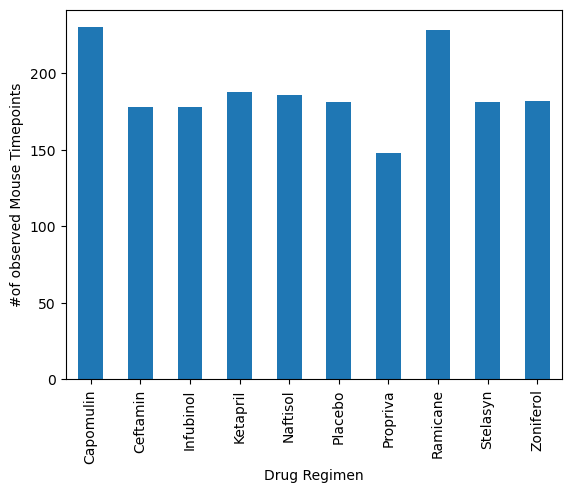

In [221]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Creating Datagrame that only looks at Drug Regiment and number of Timepoints 
timepoint_graph = pd.DataFrame(combine_results_reduced.groupby('Drug Regimen')['Timepoint'].count())
#Plotting the bar using pandas 
timepoint_graph.plot(kind = 'bar', legend=False, xlabel='Drug Regimen', ylabel='#of observed Mouse Timepoints')


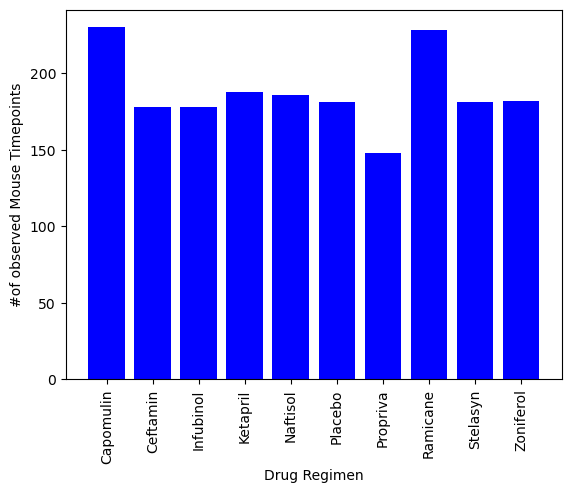

In [222]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Setting the x-values
x_axis = np.arange(0, len(summary_stats), 1)
#Defining the y-values/count of Mouse ID per Regimen
y_axis = combine_results_reduced.groupby('Drug Regimen')['Timepoint'].count()
#Plotting the bar graph
plt.bar(x_axis, y_axis, color='b', alpha=1, align="center")
#Labelling the x-axis with Drug Regimen names 
plt.xticks(x_axis, (summary_stats.index), rotation="vertical")
#Labelling the x and y-axises 
plt.xlabel("Drug Regimen")
plt.ylabel("#of observed Mouse Timepoints")
#Displays the graph 
plt.show()

<Axes: ylabel='Sex'>

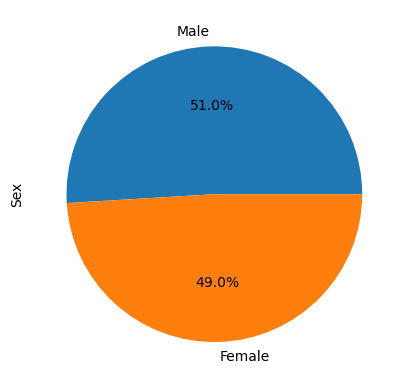

In [253]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Creating dataframe which holds the sex category and its count
sex_df = pd.DataFrame(combine_results_reduced['Sex'].value_counts())
#Plotting the pie graph using pandas 
sex_df.plot(kind = 'pie', y = 'Sex',autopct='%1.01f%%', legend=False)

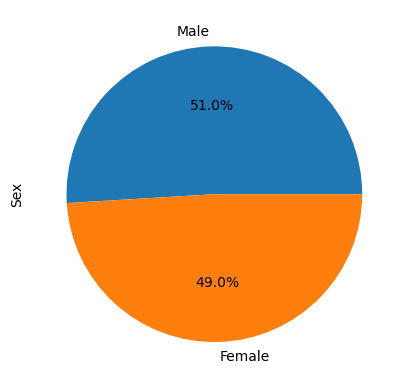

In [258]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Defining the y-value 
sex_count = sex_df['Sex']
#Labels 
sex = ["Male", "Female"]
#Crating the pieplot
plt.pie(sex_count, labels = sex, autopct='%1.01f%%')
#Displaying the Y-aligned label
plt.ylabel("Sex")
#Display the pie chart itself 
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
